<h4 style="text-align: center;">은닉인자모형 (Unobserved Component Model)</h4>

$\ \  \  \  \  $ \* $y_t =$ 시점 $t$의 불안정 시계열 관측치

1. 측정식

$\ \  \  \  \  $ \* $y_t$는 추세($\tau_t$)와 순환($c_t$)으로 분해

$$y_t = \tau_t + c_t$$
    
    
2. 전환식

$\ \  \  \  \  $ \* 추세는 drift가 있는 임의보행(random walk with drift) 과정을 따른다고 가정

$$\tau_t = \delta_{t-1} + \tau_{t-1} + N(0, {\sigma_{\tau}}^{2})$$

$\ \  \  \  \  $ \* 순환은 stationary AR(P) 과정을 따른다고 가정

$$c_t = \phi_1 c_{t-1} +\phi_2 c_{t-2}+..+\phi_P c_{t-P} + N(0, {\sigma_{c}}^{2})$$

$\ \  \  \  \  $ \* ${\sigma_{\tau}}^{2}$와 ${\sigma_{c}}^{2}$은 아래와 같이 비례한다고 가정

$$ {\sigma_{c}}^{2} = \lambda {\sigma_{\tau}}^{2} $$

$\ \  \  \  \  $ \* $\lambda$가 클수록 순환의 변동성이 커지고 추세는 변동성이 작아집니다. 따라서 $\lambda$가 클수록 관측치의 변동을 순환이 많이 설명하게 됩니다. 반대로 $\lambda$가 작을수록 관측치 중 추세의 의해서 설명되는 부분이 많아집니다. 이러한 제약없이 추정하면 관측치가 거의 대부분 추세 또는 순환 중 하나에 의해서 설명되는 문제(pile-up problem)가 발생합니다.

3. Drift 항($\delta_{t-1}$)에 대한 세 가지 옵션

$\ \  \  \  \  $옵션 (1): Drift 항이 0인 경우. 즉 $\delta_{t-1} = 0$ for all $t$. 불안정계열이면서 상승 또는 감소 추세가 없는 경우 (예를 들어, 물가상승률이나 금리, 또는 환율 등)

$\ \  \  \  \  $옵션 (2): Drift 항이 상수인 경우. 즉 $\delta_{t-1} =$ non-zeor constant for all $t$. 상승 또는 감소 추세가 있는 불안정계열이며, 상승 또는 감소 속도(즉, 증가율)이 대체로 일정한 경우 (예를 들어, 선진국의 로그 실질 GDP)

$\ \  \  \  \  $옵션 (3): Drift 항이 시변하는 경우. 이 때 Drift 항은 임의보행을 따른다고 가정. 즉 

$$\delta_{t} = \delta_{t-1} + N(0, {\sigma_{d}}^2)$$ 



$\ \  \  \  \  \ \ \ \ \ \ \ \ $상승 또는 감소 추세가 있는 불안정계열이며, 상승 또는 감소 속도(즉, 증가율)가 점차작으로 시변하는 경우 (예를 들어, 신흥국 로그 실질 GDP)

이제 실제자료를 이용해서 추정을 시작합니다!!

<단계 1> 기본 모듈을 불러옵니다. 수정없이 실행하세요.

In [8]:
import numpy as np
import pandas as pd

<단계 2> BOKpy 모듈을 불러옵니다. 수정없이 실행하세요.

In [9]:
import bok_python as bp 

<단계 3> 자료를 불러옵니다. Y가 추정에 사용될 일변수 불안정 시계열입니다.

In [10]:
# 자료 불러오기 (한국 실질 GDP)
data0 = pd.read_excel('./test_data/Data_BayesEcon.xlsx',sheet_name='GDP')
data1 = np.asmatrix(data0)
data2 = np.asmatrix(data1[4:, 1], float)

Y = 100*np.log(data2) 

<단계 4> 원하시는 모형설정을 선택합니다.

(i) Drift 항에 대한 설정

$\ \  \  \  \  $옵션 (1) drift = 'zero'

$\ \  \  \  \  $옵션 (2) drift = 'constant'

$\ \  \  \  \  $옵션 (3) drift = 'time-varying'

In [11]:
#drift = 'zero'   # 옵션 (1): No drift
# drift = 'constant'  # 옵션 (2): constant drift
drift = 'time-varying' # 옵션 (3): time-varying drift

(ii) P = AR 과정의 시차(order). 1이상 4이하 자연수로 설정하세요.

In [12]:
P = 1

(iii) lamb = $\lambda$. 이 파라메터의 값이 클수록 추세의 변동성에 비해 순환부분의 변동성이 커집니다. 먼저 1로 설정해서 추정한 다음, 추정결과를 확인하면서 lamb를 키우거나 줄이시면 됩니다. lamb는 양의 실수입니다.

In [13]:
lamb = 3

<단계 5> 마지막으로 아래 코드를 실행하시면 추정결과가 도출됩니다. 추정이 완료될 때가지 조금만 기다려주세요.

c:\Python312\Lib\site-packages\numpy\matrixlib\defmatrix.py:446: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


지금 우도함수 극대화 중입니다.
잠시만 기다려주세요.
10/10 cycle finished
극대화 작업이 완료되었습니다.
-----------------------------------------------
로그 우도 =  [-290.93718501]
BIC =  [597.29936069]
-----------------------------------------------


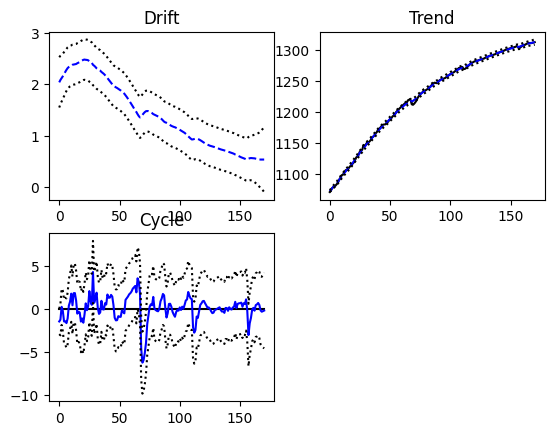

,추정치,표준오차
순환 충격 분산,1.273,0.153
Drift 충격 분산,0.009,0.007
추세 충격 분산,0.424,0.051
AR(1),0.873,0.086


In [14]:
Drift, Drift_SE, Trend, Trend_SE, Cycle, Cycle_SE, Table_para, lnL, BIC = bp.SSM_UC_model(Y, P, lamb, drift)
# Drift = Drift 시계열 추정치
# Drift_SE = Drift의 표준오차 시계열 추정치
# Trend = 추세 시계열 추정치
# Trend_SE = 추세 표준오차 시계열 추정치
# Cycle = 순환 시계열 추정치
# Cycle_SE = 순환 표준오차 시계열 추정치
# lnL = 우도(likelihood)
# BIC = 베이지안 정보기준(Bayesian Information Criterion)
Table_para # Table_para = 파라메터 추정결과 (DataFrame)